In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [15]:
# Create empty lists for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of 1500 random lat and lng combinations. Using 1500 to ensure we get required minimum 500 cities in dataset.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat_lng combination, leveraging CitiPy Module
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print count of cities to ensure we have the minimum 500 
len(cities)

642

# Perform API Calls

Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [16]:
# openweathermap api url, pass it my api key (can test url by pasting in browser)
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [17]:
# Create empty lists for storing weather data from API
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set initial count of 1 for loop
record =1

# Include a print log of each city as it'sbeing processed (with the city number and city name).
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------


In [18]:
# fetch data for each city in list, using FOR loop (try enumerate in the FOR loop, see link from Raina)
for city in cities:
    try:        # TRY statement appends when value is not NULL (city exists in CityPy module)
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        record= record + 1 # Increment counter  
        time.sleep(1.01) # Pause for one second in loop, to avoid maxing out API limit
    except: # EXCEPT skips to next row, where OpenWeatherMap is missing the city generated by CityPy module
        print("City not found. Skipping...")
    continue

Processing Record 1 | Nizwá
http://api.openweathermap.org/data/2.5/weather?&q=nizwa
Processing Record 2 | Dzhebariki-Khaya
http://api.openweathermap.org/data/2.5/weather?&q=dzhebariki-khaya
Processing Record 3 | Miles City
http://api.openweathermap.org/data/2.5/weather?&q=miles city
Processing Record 4 | Chai Badan
http://api.openweathermap.org/data/2.5/weather?&q=chai badan
City not found. Skipping...
Processing Record 5 | Pak Phanang
http://api.openweathermap.org/data/2.5/weather?&q=pak phanang
Processing Record 6 | Narsimhapur
http://api.openweathermap.org/data/2.5/weather?&q=narsimhapur
Processing Record 7 | Mataura
http://api.openweathermap.org/data/2.5/weather?&q=mataura
Processing Record 8 | Tongchuanshi
http://api.openweathermap.org/data/2.5/weather?&q=tongchuan
Processing Record 9 | Dingle
http://api.openweathermap.org/data/2.5/weather?&q=dingle
Processing Record 10 | Vaini
http://api.openweathermap.org/data/2.5/weather?&q=vaini
Processing Record 11 | São Filipe
http://api.ope

Processing Record 89 | Verkh-Usugli
http://api.openweathermap.org/data/2.5/weather?&q=verkh-usugli
Processing Record 90 | Kinlochleven
http://api.openweathermap.org/data/2.5/weather?&q=kinlochleven
Processing Record 91 | Port Blair
http://api.openweathermap.org/data/2.5/weather?&q=port blair
Processing Record 92 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?&q=hithadhoo
Processing Record 93 | Brae
http://api.openweathermap.org/data/2.5/weather?&q=brae
Processing Record 94 | Lata
http://api.openweathermap.org/data/2.5/weather?&q=lata
Processing Record 95 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?&q=yellowknife
Processing Record 96 | Hatillo
http://api.openweathermap.org/data/2.5/weather?&q=hatillo
Processing Record 97 | East London
http://api.openweathermap.org/data/2.5/weather?&q=east london
Processing Record 98 | Chui
http://api.openweathermap.org/data/2.5/weather?&q=chuy
City not found. Skipping...
Processing Record 99 | Chokurdakh
http://api.openweath

Processing Record 176 | Quime
http://api.openweathermap.org/data/2.5/weather?&q=quime
Processing Record 177 | Sitka
http://api.openweathermap.org/data/2.5/weather?&q=sitka
Processing Record 178 | Swift Current
http://api.openweathermap.org/data/2.5/weather?&q=swift current
Processing Record 179 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?&q=mount gambier
Processing Record 180 | Varkala
http://api.openweathermap.org/data/2.5/weather?&q=varkkallai
Processing Record 181 | Hamilton
http://api.openweathermap.org/data/2.5/weather?&q=hamilton
Processing Record 182 | Celestún
http://api.openweathermap.org/data/2.5/weather?&q=celestun
Processing Record 183 | Berezovyy
http://api.openweathermap.org/data/2.5/weather?&q=berezovyy
Processing Record 184 | Bad Langensalza
http://api.openweathermap.org/data/2.5/weather?&q=bad langensalza
Processing Record 185 | Fort-Shevchenko
http://api.openweathermap.org/data/2.5/weather?&q=fort-shevchenko
Processing Record 186 | Sangar
http://api

Processing Record 261 | Ørsta
http://api.openweathermap.org/data/2.5/weather?&q=orsta
Processing Record 262 | Tabas
http://api.openweathermap.org/data/2.5/weather?&q=tabas
Processing Record 263 | Ati
http://api.openweathermap.org/data/2.5/weather?&q=ati
Processing Record 264 | Santiago del Estero
http://api.openweathermap.org/data/2.5/weather?&q=santiago del estero
Processing Record 265 | Ilhéus
http://api.openweathermap.org/data/2.5/weather?&q=ilheus
City not found. Skipping...
Processing Record 266 | Rundu
http://api.openweathermap.org/data/2.5/weather?&q=rundu
Processing Record 267 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?&q=bambous virieux
Processing Record 268 | Cherskiy
http://api.openweathermap.org/data/2.5/weather?&q=cherskiy
Processing Record 269 | Zabul Province
http://api.openweathermap.org/data/2.5/weather?&q=zabol
Processing Record 270 | Lambaré
http://api.openweathermap.org/data/2.5/weather?&q=lambare
Processing Record 271 | Husavik
http://api.open

Processing Record 349 | Naze
http://api.openweathermap.org/data/2.5/weather?&q=naze
Processing Record 350 | Honiara
http://api.openweathermap.org/data/2.5/weather?&q=honiara
City not found. Skipping...
Processing Record 351 | Samarai
http://api.openweathermap.org/data/2.5/weather?&q=samarai
Processing Record 352 | Praia
http://api.openweathermap.org/data/2.5/weather?&q=praia
Processing Record 353 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?&q=srednekolymsk
Processing Record 354 | Atocha
http://api.openweathermap.org/data/2.5/weather?&q=atocha
Processing Record 355 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?&q=lavrentiya
Processing Record 356 | Megion
http://api.openweathermap.org/data/2.5/weather?&q=megion
Processing Record 357 | St. George's
http://api.openweathermap.org/data/2.5/weather?&q=saint-georges
Processing Record 358 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?&q=makakilo city
Processing Record 359 | Tianpeng
http://api.o

Processing Record 434 | Kawambwa
http://api.openweathermap.org/data/2.5/weather?&q=kawambwa
Processing Record 435 | Luís Correia
http://api.openweathermap.org/data/2.5/weather?&q=luis correia
City not found. Skipping...
Processing Record 436 | Nacogdoches
http://api.openweathermap.org/data/2.5/weather?&q=nacogdoches
Processing Record 437 | Eenhana
http://api.openweathermap.org/data/2.5/weather?&q=eenhana
Processing Record 438 | Līsakovsk
http://api.openweathermap.org/data/2.5/weather?&q=lisakovsk
Processing Record 439 | Kendari
http://api.openweathermap.org/data/2.5/weather?&q=kendari
Processing Record 440 | Saint Anthony
http://api.openweathermap.org/data/2.5/weather?&q=saint anthony
Processing Record 441 | Lagoa
http://api.openweathermap.org/data/2.5/weather?&q=lagoa
Processing Record 442 | Doha
http://api.openweathermap.org/data/2.5/weather?&q=doha
Processing Record 443 | Portland
http://api.openweathermap.org/data/2.5/weather?&q=portland
Processing Record 444 | Punta Alta
http://ap

Processing Record 521 | Melilla
http://api.openweathermap.org/data/2.5/weather?&q=melilla
Processing Record 522 | Kinablangan
http://api.openweathermap.org/data/2.5/weather?&q=kinablangan
Processing Record 523 | Tangping
http://api.openweathermap.org/data/2.5/weather?&q=tangping
Processing Record 524 | Arinos
http://api.openweathermap.org/data/2.5/weather?&q=arinos
Processing Record 525 | Orlik
http://api.openweathermap.org/data/2.5/weather?&q=orlik
Processing Record 526 | Chacabuco
http://api.openweathermap.org/data/2.5/weather?&q=chacabuco
Processing Record 527 | Boo
http://api.openweathermap.org/data/2.5/weather?&q=boo
Processing Record 528 | Luba
http://api.openweathermap.org/data/2.5/weather?&q=luba
Processing Record 529 | Umm Hājar
http://api.openweathermap.org/data/2.5/weather?&q=oum hadjer
Processing Record 530 | Kutum
http://api.openweathermap.org/data/2.5/weather?&q=kutum
Processing Record 531 | Campbell River
http://api.openweathermap.org/data/2.5/weather?&q=campbell river
P

# Convert Raw Data to DataFrame
Export the city data into a .csv.
Display the DataFrame

In [41]:
# Create dictionary with all the lists from API calls
weather_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
# Create dataframe from above Dictionary
weather_df = pd.DataFrame(weather_dictionary)
weather_df
# Drop rows with humidity > 100%
weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = True)
# Create and save CSV file from above DataFrame
weather_df.to_csv('output_data/cities.csv')
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Nizwá,0,OM,1604282371,32,22.93,57.53,59.31,2.35
1,Dzhebariki-Khaya,0,RU,1604282372,83,62.22,135.80,-4.76,3.27
2,Miles City,1,US,1604282373,39,46.41,-105.84,50.00,5.82
3,Chai Badan,74,TH,1604282374,77,15.20,101.13,79.36,10.31
4,Pak Phanang,40,TH,1604282376,94,8.35,100.20,80.60,4.70
...,...,...,...,...,...,...,...,...,...
586,East Wenatchee Bench,1,US,1604283122,53,47.43,-120.28,50.00,5.82
587,San Vicente,0,AR,1604283123,66,-26.62,-54.13,59.59,4.41
588,Ostrovnoy,100,RU,1604283125,92,68.05,39.51,39.00,23.42
589,College,20,US,1604283073,77,64.86,-147.80,-0.99,1.63


# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

# Latitude vs. Temperature Plot

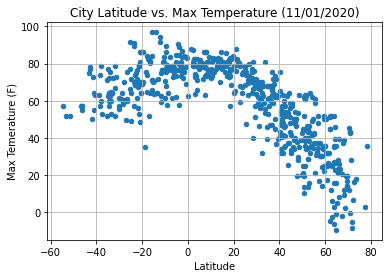

In [24]:
weather_df.plot('Lat', 'Max Temp', kind='scatter')
plt.title("City Latitude vs. Max Temperature (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.show()

# Latitude vs. Humidity Plot

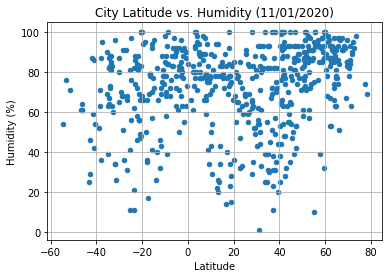

In [26]:
weather_df.plot('Lat', 'Humidity', kind='scatter')
plt.title("City Latitude vs. Humidity (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.show()

# Latitude vs. Cloudiness Plot

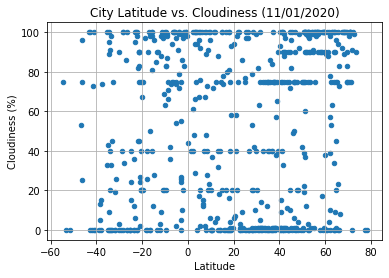

In [28]:
weather_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.title("City Latitude vs. Cloudiness (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.show()

# Latitude vs. Wind Speed Plot

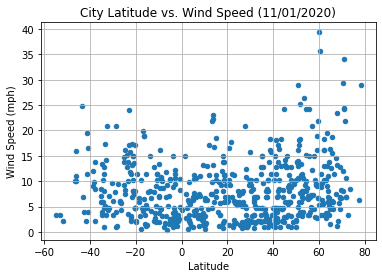

In [29]:
weather_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.title("City Latitude vs. Wind Speed (11/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.show()

# Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7282848462736949


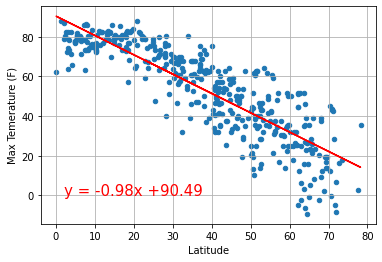

In [57]:
# Create dataframe from above Dictionary
north_hemisphere_df = pd.DataFrame(weather_dictionary)
# Create Northern Hemisphere DataFrame (drop all rows with Latitude less than zero)
north_hemisphere_df.drop(north_hemisphere_df[north_hemisphere_df["Lat"] < 0].index, inplace = True)
# Perform a linear regression on temperature vs. latitude
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2622195129764234


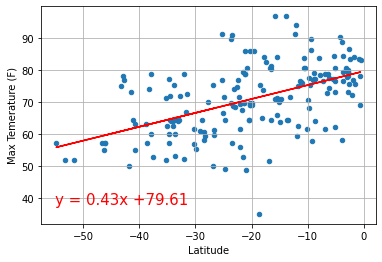

In [59]:
# Create dataframe from above Dictionary
south_hemisphere_df = pd.DataFrame(weather_dictionary)
# Create Northern Hemisphere DataFrame (drop all rows with Latitude less than zero)
south_hemisphere_df.drop(south_hemisphere_df[south_hemisphere_df["Lat"] > 0].index, inplace = True)
# Perform a linear regression on temperature vs. latitude
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Max Temp', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (F)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05492953784813423


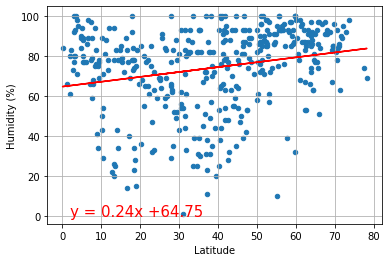

In [60]:
# Perform a linear regression on temperature vs. Humidity
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,0),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06226996402754211


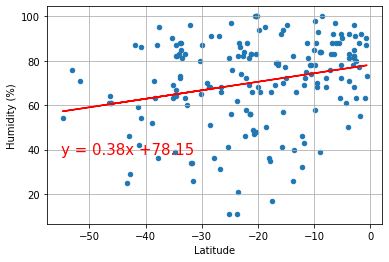

In [61]:
# Perform a linear regression on temperature vs. humidity
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Humidity', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,38),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.036944678020577146


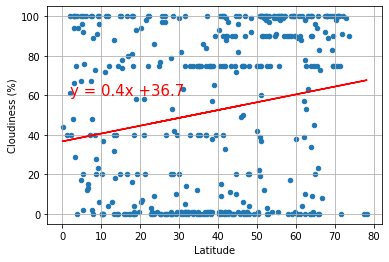

In [72]:
# Perform a linear regression on temperature vs. Cloudiness
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(2,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08925636432359148


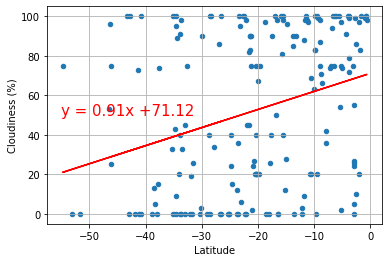

In [69]:
# Perform a linear regression on temperature vs. humidity
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Cloudiness', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07232285623916586


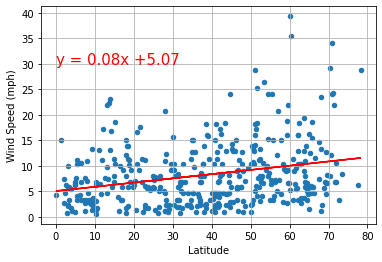

In [68]:
# Perform a linear regression on temperature vs. wind speed
x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
north_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04116557310936668


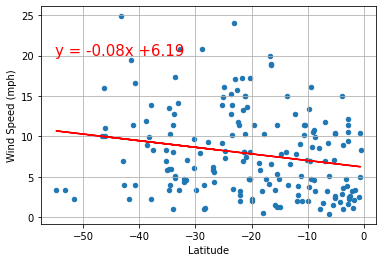

In [74]:
# Perform a linear regression on temperature vs. wind speed
x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
south_hemisphere_df.plot('Lat', 'Wind Speed', kind='scatter')
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=None)
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()